## Dipole Plasmon as a Harmonic Oscillator

It is instructive to model a plasmon excitation as electrons undergoing simple harmonic motion. To do this, we start with the Drude Model (Maier, S. Introduction to Plasmonics 



In [1]:
from coupled_harmonic_osc import CoupledOscillators
import numpy as np
import matplotlib.pyplot as plt

def constants():
    # Universal Constants 
    c = 2.998E+10 # speed of light [cm/s]
    hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]
    e = 4.80326E-10 # elementary charge, [statC, g^1/2 cm^3/2 s^-1]
    
    # Au Metal Constants -- Fits Drude to JC
    wp = 9. # eV, bulk plasma frequency 
    eps_inf = 9.7 # [unitless], static dielectric response of ionic background 
    gamNR_qs = 0.073 # non-radiative Drude damping [eV]
    eps_b = 1.1**2 # background dielectric constant
    
    return np.array([c, hbar_eVs, e, wp, eps_inf, gamNR_qs, eps_b])



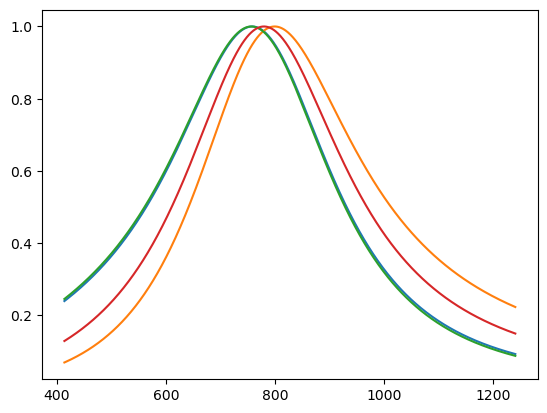

In [2]:

radii = 150
single_osc = CoupledOscillators(
                 constants(), # drude constants 
                 1, # number of particles
                 1, # dipoles per particle
                 np.array([[0, 0]]), # particle centers
                 np.array([[1, 0]]), # dipole orientations
                 np.array([int(radii)*1.E-7]), # radii
                 np.array([0]), # kind
                 )

w0, m, gamNR = single_osc.dipole_parameters()

w = np.arange(1, 3, .001)

alpha = single_osc.alpha(w=w)
extinc, absorp, scat = single_osc.cross_sections(w=w)

plt.plot(1240/w, extinc/max(extinc), label='Ext.')
plt.plot(1240/w, absorp/max(absorp), label='Abs.')
plt.plot(1240/w, scat/max(scat), label='Sca')
plt.plot(1240/w, np.imag(alpha)/max(np.imag(alpha)), label='Alpha')


# plt.legend()
# plt.xlim([425,525])


[5.78772169 3.69628529 7.49584311]
Width extinction: 4 nm
[5.29237058 3.24773765 8.18809832]
Width absorption: 3 nm
[5.79597203 3.70414597 7.46967872]
Width scattering: 4 nm


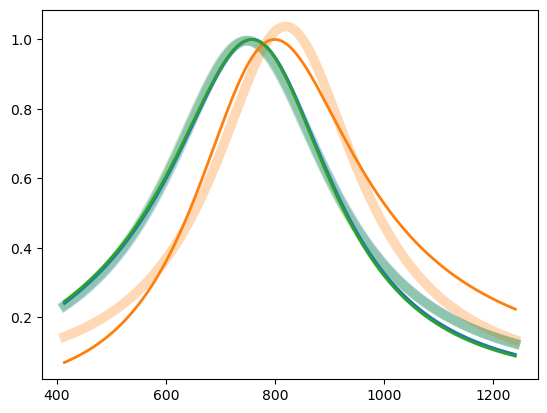

In [3]:
from scipy import optimize
from scipy.interpolate import interp1d


def lorentzian(wave, A1, Gam1, x01,):
    gsc=100
    xscale=100
    return A1*100/np.pi*(Gam1*gsc/2/((wave-x01*xscale)**2+(Gam1*gsc/2)**2))

def fit_func(data, clr):
    params, pcov = optimize.curve_fit(lorentzian, 1240/w, data)
    print(params)
    perr = np.sqrt(np.diag(pcov))
    plt.plot(1240/w, data, label='data', linewidth=2, zorder=2, color=clr)
    plt.plot(1240/w, lorentzian(1240/w, *params), label='fit', linewidth=7, zorder=1, color=clr, alpha=.3)
    return params[1]

print('Width extinction:', int(np.round(fit_func(data=extinc/max(extinc), clr='tab:blue'))), 'nm')
print('Width absorption:', int(np.round(fit_func(data=absorp/max(absorp), clr='tab:orange'))), 'nm')
print('Width scattering:', int(np.round(fit_func(data=scat/max(scat), clr='tab:green'))), 'nm')



## Let's Calculate a Bunch

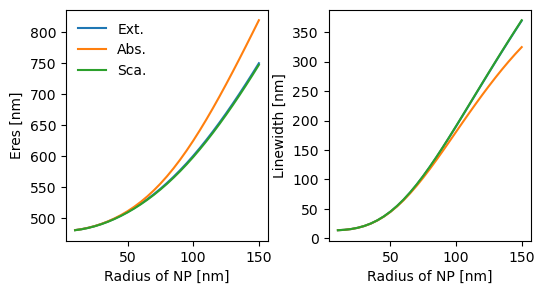

In [4]:
radius_range = np.arange(10,151,5)
Eres = np.zeros((len(radius_range),3))
linewidth = np.zeros((len(radius_range),3))


for idx, val in enumerate(radius_range):
    single_osc = CoupledOscillators(
                     constants(), # drude constants 
                     1, # number of particles
                     1, # dipoles per particle
                     np.array([[0, 0]]), # particle centers
                     np.array([[1, 0]]), # dipole orientations
                     np.array([int(val)*1.E-7]), # radii
                     np.array([0]), # kind
                     )

    w0, m, gamNR = single_osc.dipole_parameters()
    w = np.arange(1, 3, .001)
    extinc, absorp, scat = single_osc.cross_sections(w=w)
    
    all_data = [extinc/max(extinc), absorp/max(absorp), scat/max(scat)]
    for idxi, vali in enumerate(all_data):
        params, pcov = optimize.curve_fit(lorentzian, 1240/w, vali)
        Eres[idx, idxi] = params[2]
        linewidth[idx, idxi] = params[1]

fig, ax = plt.subplots(1,2, figsize=[6,3], sharex=True)    
ax[0].plot(radius_range, Eres[:,0]*100, label='Ext.')
ax[0].plot(radius_range, Eres[:,1]*100, label='Abs.')
ax[0].plot(radius_range, Eres[:,2]*100, label='Sca.')

ax[1].plot(radius_range, linewidth[:,0]*100, label='Ext.')
ax[1].plot(radius_range, linewidth[:,1]*100, label='Abs.')
ax[1].plot(radius_range, linewidth[:,2]*100, label='Sca.')

ax[0].legend(frameon=False)
ax[0].set_xlabel('Radius of NP [nm]'); ax[1].set_xlabel('Radius of NP [nm]')
ax[0].set_ylabel('Eres [nm]')
ax[1].set_ylabel('Linewidth [nm]')

fig.subplots_adjust(wspace=.3)